# Answer 1 - Ambitious Jo

In [1]:
import numpy as np
import os
import cv2
import math
import matplotlib.pyplot as plt
IMG_PATH = '../imgs/' 

## 1.1

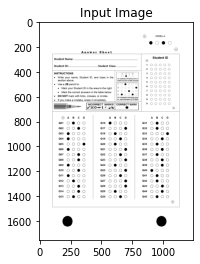

In [2]:
# loading images
answerKey = cv2.imread(IMG_PATH+'answerKey.jpg')
answerKey = cv2.cvtColor(answerKey,cv2.COLOR_BGR2GRAY)
plt.imshow(answerKey, cmap="gray")
plt.title("Input Image")
plt.show()

In [3]:
def erode(img,filter):
  # Padding image
  maxVal = np.max(filter.shape)
  img3 = np.zeros((img.shape[0] + 2 * maxVal, img.shape[1] + 2 * maxVal))
  img3[maxVal:img3.shape[0] - maxVal, maxVal:img3.shape[1] - maxVal] = img
  img3 = img3.astype('float')
  filter = filter.astype('float')
  img2 = img3.copy()
  # Convolution
  for r in range(filter.shape[0], img2.shape[0] - filter.shape[0] + 1):
    for c in range(filter.shape[1], img2.shape[1] - filter.shape[1] + 1):
      img2[r][c] = np.min(img3[r - int(filter.shape[0] / 2):r - int(filter.shape[0] / 2) + filter.shape[0], c - int(filter.shape[1] / 2):c - int(filter.shape[1] / 2) + filter.shape[1]]*filter)
  # Remove padded region and return image
  return img2[maxVal:img2.shape[0] - maxVal, maxVal:img2.shape[1] - maxVal]

In [4]:
def dilate(img, filter):
  # Padding image
  maxVal = np.max(filter.shape)
  img3 = np.zeros((img.shape[0] + 2 * maxVal, img.shape[1] + 2 * maxVal))
  img3[maxVal:img3.shape[0] - maxVal, maxVal:img3.shape[1] - maxVal] = img
  img3 = img3.astype('float')
  filter = filter.astype('float')
  img2 = img3.copy()
  # Convolution
  for r in range(filter.shape[0], img2.shape[0] - filter.shape[0] + 1):
    for c in range(filter.shape[1], img2.shape[1] - filter.shape[1] + 1):
      img2[r][c] = np.max(img3[r - int(filter.shape[0] / 2):r - int(filter.shape[0] / 2) + filter.shape[0], c - int(filter.shape[1] / 2):c - int(filter.shape[1] / 2) + filter.shape[1]]*filter)
  # Remove padded region and return image
  return img2[maxVal:img2.shape[0] - maxVal, maxVal:img2.shape[1] - maxVal]

In [5]:
img = np.copy(answerKey)
c = ([236,814], [573,814], [910,814])
w_diff = 42
h_diff = 42.5
r = 12
area = math.pi*r*r
approx_area = int(area*0.7)
rows = 15
columns = 4
parts = 3
answers = np.zeros([rows*parts,columns])
img_copy = np.copy(img)

# applying thresholding
img_copy[img <= 200] = 0
img_copy[img > 200] = 1

# taking inverse of img so that white will be filled in darkened circles
img_copy = np.logical_not(img_copy).astype(int)

# applying closing to fill gaps in manually filled answer sheets
dilated = dilate(img_copy, np.ones([5,5]))
eroded = erode(dilated, np.ones([5,5]))

const = 0
for i in range(parts):
        centre_x,centre_y = c[i]
        for j in range(rows):
            centre_x = c[i][0]
            for k in range(columns):
                # check sum of area within circle of radius r
                temp = img_copy[centre_y-r-1:centre_y+r,centre_x-r:centre_x+r+1]
                if np.sum(temp) >= approx_area:
                    answers[(const+j),k] = 1
                centre_x += w_diff
            centre_y = c[i][1] + int(np.rint(h_diff*(j+1)))
        const += 15

In [6]:
# print(np.sum(answers))
for i in range(answers.shape[0]):
    k = np.where(answers[i]==1)
    if k[0]==0:
        print("A")
    elif (k[0]==1):
        print("B")
    elif k[0]==2:
        print("C")
    elif k[0]==3:
        print("D")
    else:
        print("-1")

B
C
A
A
D
A
C
C
A
C
A
B
C
C
B
A
D
B
C
B
D
C
D
B
D
C
D
D
B
C
B
B
D
C
B
C
B
C
C
A
B
B
C
C
B


## 1.2

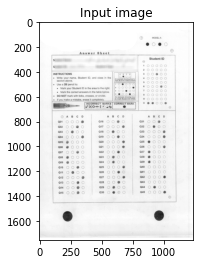

In [7]:
# loading images
sampleStudentOMRSheet = cv2.imread(IMG_PATH+'sampleStudentOMRSheet.png')
sampleStudentOMRSheet = cv2.cvtColor(sampleStudentOMRSheet,cv2.COLOR_BGR2GRAY)
plt.imshow(sampleStudentOMRSheet,cmap="gray")
plt.title("Input image")
plt.show()

In [8]:
def imrotate(img,theta,retainAllPixels):
    rad = math.radians(theta)
    if retainAllPixels == True:                                                                     # retain all pixels
        # print(img.shape)
        # calculating dims of new image
        h_new = round(abs(img.shape[0]*math.cos(rad)))+round(abs(img.shape[1]*math.sin(rad)))+1
        w_new = round(abs(img.shape[0]*math.sin(rad)))+round(abs(img.shape[1]*math.cos(rad)))+1
        out = np.zeros([h_new,w_new]).astype(np.uint64)
    else:                                                                                           # dont retain all pixels
        h_new = img.shape[0]
        w_new = img.shape[1]
        out = np.zeros([h_new,w_new]).astype(np.uint64)
    cen_h0 = round(((img.shape[0]+1)/2)-1)
    cen_w0 = round(((img.shape[1]+1)/2)-1)
    # print(cen_h0,cen_w0)
    cen_h1 = round(((out.shape[0]+1)/2)-1)
    cen_w1 = round(((out.shape[1]+1)/2)-1)
    # print(x0, y0)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x0=img.shape[1]-1-j-cen_w0                          # original img coords wrt original img centre
            y0=img.shape[0]-1-i-cen_h0                   

            x1=cen_w1 - round(x0*math.cos(rad)+y0*math.sin(rad))         # new coords after rotation. also wrt new img centre
            y1=cen_h1 - round(-x0*math.sin(rad)+y0*math.cos(rad))
          
            if x1 < w_new and y1 < h_new and x1>=0 and y1>=0:
                out[y1,x1] = img[i,j]
    return out.astype(np.uint64)

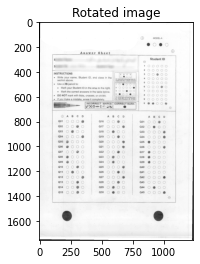

In [9]:
sampleStudentOMRSheet2 = imrotate(sampleStudentOMRSheet,-0.5,False)                # tested for 0.4,0.6,0.65,0.55,0.51,0.5 and many more.  checked in paint if bottom line is straight or not
plt.imshow(sampleStudentOMRSheet2,cmap="gray")
plt.title("Rotated image")
plt.show()

In [10]:
img = np.copy(sampleStudentOMRSheet2)
c = ([229,799], [558,800], [887,803])
w_diff = 41
h_diff = 40.76
r = 11
area = math.pi*r*r
approx_area = int(area*0.7)
rows = 15
columns = 4
parts = 3
answers2 = np.zeros([rows*parts,columns])
img_copy = np.copy(img)

# applying thresholding
img_copy[img <= 200] = 0
img_copy[img > 200] = 1

# taking inverse of img so that white will be filled in darkened circles
img_copy = np.logical_not(img_copy).astype(int)

# applying closing to fill gaps in manually filled answer sheets
dilated = dilate(img_copy, np.ones([5,5]))
eroded = erode(dilated, np.ones([5,5]))

const = 0
for i in range(parts):
        centre_x,centre_y = c[i]
        for j in range(rows):
            centre_x = c[i][0]
            for k in range(columns):
                # check sum of area within circle of radius r
                temp = img_copy[centre_y-r-1:centre_y+r,centre_x-r:centre_x+r+1]
                if np.sum(temp) >= approx_area:
                    answers2[(const+j),k] = 1
                    # print((const+j),k)
                centre_x += w_diff
            centre_y = c[i][1] + int(np.rint(h_diff*(j+1)))
        const += 15

In [11]:
# print(np.sum(answers2))
# for i in range(answers2.shape[0]):
#     k = np.where(answers2[i]==1)
#     if k[0].size == 0:
#         print("-1")
#     elif k[0]==0:
#         print("A")
#     elif (k[0]==1):
#         print("B")
#     elif k[0]==2:
#         print("C")
#     elif k[0]==3:
#         print("D")

In [12]:
marks = 0
for i in range(answers2.shape[0]):
    k = np.where(answers2[i]==1)
    l = np.where(answers[i]==1)
    if k[0].size == 0:
        marks += 0
    elif k[0] == l[0]:
        marks += 4
    elif k[0] != l[0]:
        marks -= 1
print("Final Score = %i" %marks)

Final Score = 53


## 1.3 BONUS

In [13]:
img = np.copy(sampleStudentOMRSheet2)
c = [884,354]
w_diff = 34
h_diff = 33.3
r = 10
area = math.pi*r*r
approx_area = int(area*0.7)
rows = 10
columns = 5
parts = 1
user_no = np.zeros([rows*parts,columns])
img_copy = np.copy(img)

# applying thresholding
img_copy[img <= 200] = 0
img_copy[img > 200] = 1

# taking inverse of img so that white will be filled in darkened circles
img_copy = np.logical_not(img_copy).astype(int)

# applying closing to fill gaps in manually filled answer sheets
dilated = dilate(img_copy, np.ones([5,5]))
eroded = erode(dilated, np.ones([5,5]))

const = 0
for i in range(parts):
        centre_x,centre_y = c
        for j in range(rows):
            centre_x = c[0]
            for k in range(columns):
                # check sum of area within circle of radius r
                temp = img_copy[centre_y-r-1:centre_y+r,centre_x-r:centre_x+r+1]
                if np.sum(temp) >= approx_area:
                    user_no[(const+j),k] = 1
                    # print((const+j),k)
                centre_x += w_diff
            centre_y = c[1] + int(np.rint(h_diff*(j+1)))
        const += 15

In [125]:
# user_no = user_no.T
roll_no = 0
mult_factor = 1
for i in range(user_no.shape[0]):
    k = np.where(user_no[user_no.shape[0] - 1 - i] == 1)
    if k[0] == 9:
        print(0)
        roll_no += 0
    else:
        roll_no += (k[0]+1)*mult_factor
        print(int(k[0]+1))
    mult_factor *= 10
print("Roll No = %i" %roll_no)
# print((user_no.shape[0]))

0
6
3
0
0
Roll No = 360


# Answer 2 - Creed’s Side Gig

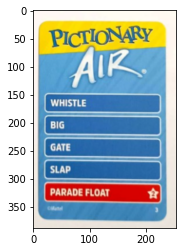

In [15]:
# loading images
pictionary = cv2.imread(IMG_PATH+'pictionary.png')
pictionary = cv2.cvtColor(pictionary,cv2.COLOR_BGR2RGB)
plt.imshow(pictionary)
plt.show()

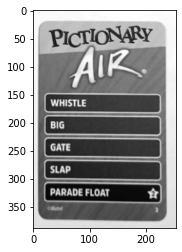

In [16]:
pictionary = cv2.cvtColor(pictionary,cv2.COLOR_RGB2GRAY)
plt.imshow(pictionary,cmap="gray")
plt.show()

In [17]:
def piecewiseLinTransform(img,k1,k2,a,b):
    img = img.astype(float)/255
    temp = img
    dimensions = temp.shape
    height = dimensions[0]
    width = dimensions[1]
    for i in range(height):
        for j in range(width):
            for k in range(len(k1)):
                if(img[i,j]>=a[k] and img[i,j]<b[k]):
                    temp[i,j] = np.round((img[i,j]*k1[k]+k2[k])*255)
                    break
    img = img*255
    return temp.astype(np.uint8)

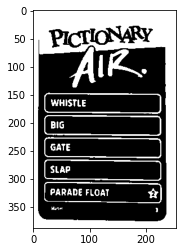

In [18]:
# applying thresholding using liecewise linear transform
k1 = [0,0]
k2 = [0,1]
a = [0,0.666]
b = [0.666,1]
pictionary_new = (piecewiseLinTransform(pictionary,k1,k2,a,b)/255).astype(np.uint64)        
# fig = plt.figure(figsize=[20,20])
plt.imshow(pictionary_new,cmap="gray")
plt.show()

In [19]:
def comb(inpA, list):
    if list[inpA] == inpA:
        return inpA
    else:
        list[inpA] = comb(list[inpA], list)
        return list[inpA]

In [20]:
def connectedComponentLabelling (img):
    out = np.zeros([img.shape[0],img.shape[1]], dtype=int)
    # First Pass
    curr_label = 1
    label_list = [0]
    for row in range(out.shape[0]):
        for column in range(out.shape[1]):
            if img[row,column] != 0:
                connected = []
                # Finding connected neighbours
                if row > 0:
                    if img[row-1][column] == img[row, column]:
                        connected.append((row-1, column))
                if column > 0:
                    if (img[row, column-1] == img[row, column]):
                        connected.append((row, column-1))
                if len(connected) == 0:
                    label_list.append(curr_label)
                    out[row, column] = curr_label
                    curr_label += 1
                else:
                    set = [out[r, c] for r, c in connected]
                    out[row, column] = np.min(set)
                    for label in set:
                        label_list[comb(label,label_list)] = comb(out[row, column],label_list)    
    # Second Pass
    for row in range(out.shape[0]):
        for column in range(out.shape[1]):
            if img[row, column] != 0:
                out[row, column] = comb(out[row, column], label_list)
    return out

In [21]:
labelled = connectedComponentLabelling(pictionary_new)

In [22]:
from random import randrange
def generate_colors(n):
    r = []
    g = []
    b = []
    for i in range(n):
        r.append(randrange(255))
        g.append(randrange(255))
        b.append(randrange(255))
    return r,g,b

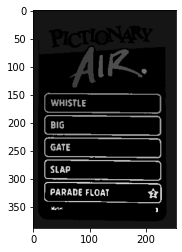

In [23]:
# fig = plt.figure(figsize=[20,20])
plt.imshow(labelled,cmap="gray")
labels = np.unique(labelled)
# print(labels)                # => 52 different labels
labels = labels.tolist()

In [24]:
r,g,b = generate_colors(52)

<function matplotlib.pyplot.show(close=None, block=None)>

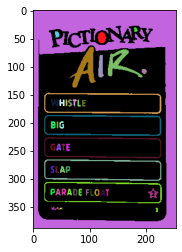

In [25]:
colored = np.zeros([labelled.shape[0],labelled.shape[1],3], dtype=int)
for i in range(labelled.shape[0]):
        for j in range(labelled.shape[1]):
            if labelled[i][j] != 0:
                temp = labels.index(labelled[i][j])
                # print(temp)
                colored[i][j][0] = r[temp]
                colored[i][j][1] = g[temp]
                colored[i][j][2] = b[temp]
# fig = plt.figure(figsize=[20,20])
plt.imshow(colored)
plt.show

# Answer 3 - Color Operations

## 3.1 Median Filtering

In [26]:
# loading images
salt = cv2.imread(IMG_PATH+'salt.png')
salt = cv2.cvtColor(salt,cv2.COLOR_BGR2RGB)

In [27]:
def medianFilter(img, k):
    # Splitting image into r,g,b channels
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    kSqr = k ** 2
    kby2 = int(k/2)
    # Padding image
    img3 = np.zeros((img.shape[0] + 2 * kby2, img.shape[1] + 2 * kby2))
    img4 = np.zeros((img.shape[0] + 2 * kby2, img.shape[1] + 2 * kby2))
    img5 = np.zeros((img.shape[0] + 2 * kby2, img.shape[1] + 2 * kby2))
    img3[kby2:img3.shape[0] - kby2, kby2:img3.shape[1] - kby2] = red
    img4[kby2:img3.shape[0] - kby2, kby2:img3.shape[1] - kby2] = green
    img5[kby2:img3.shape[0] - kby2, kby2:img3.shape[1] - kby2] = blue
    red = img3.copy()
    green = img4.copy()
    blue = img5.copy()
    # Applying filter on each channel separately
    for r in range(kby2, img3.shape[0] - kby2):
        for c in range(kby2, img3.shape[1] - kby2):
            red[r][c] = np.median(img3[r - int(k / 2):r - int(k / 2) + k, c - int(k / 2):c - int(k / 2) + k])
            green[r][c] = np.median(img4[r - int(k / 2):r - int(k / 2) + k, c - int(k / 2):c - int(k / 2) + k])
            blue[r][c] = np.median(img5[r - int(k / 2):r - int(k / 2) + k, c - int(k / 2):c - int(k / 2) + k])
    # merging channels
    result = np.zeros([red.shape[0],red.shape[1],3])
    result[:,:,0] = red
    result[:,:,1] = green
    result[:,:,2] = blue
    # Removing padded region and returning
    return np.rint(result[kby2:result.shape[0] - kby2, kby2:result.shape[1] - kby2]).astype('uint8')

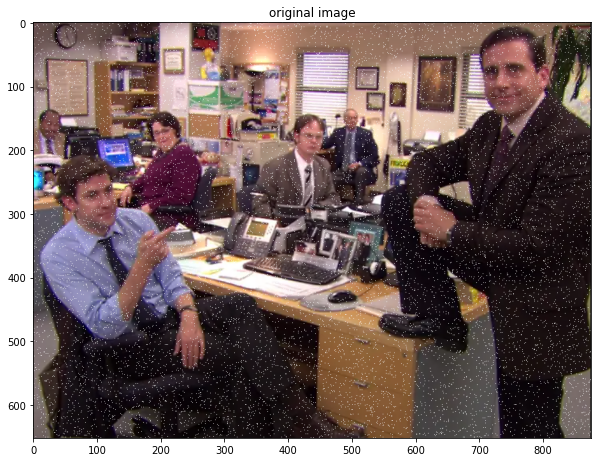

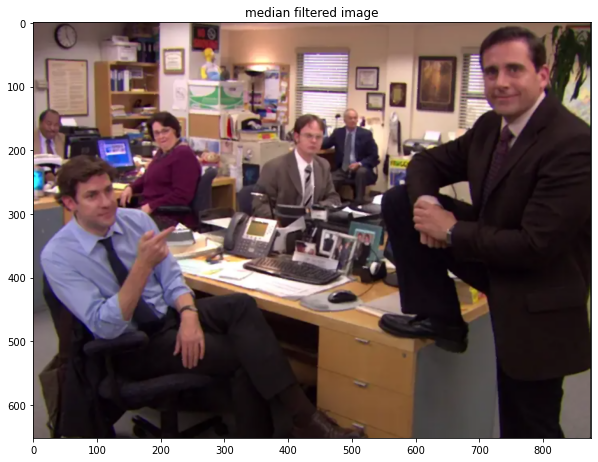

In [28]:
salt_new = medianFilter(salt,3)
fig = plt.figure(figsize=[10,10])
plt.imshow(salt)
plt.title("original image")
fig = plt.figure(figsize=[10,10])
plt.imshow(salt_new)
plt.title("median filtered image")
plt.show()

## 3.2 Contrast Stretching

In [29]:
# loading images
landscape = cv2.imread(IMG_PATH+'landscape.png')
landscape = cv2.cvtColor(landscape,cv2.COLOR_BGR2RGB)
landscape_hsv = cv2.cvtColor(landscape,cv2.COLOR_RGB2HSV)
# plt.imshow()

In [30]:
def piecewiseLinTransform(img,k1,k2,a,b):
    img = img.astype(float)/255
    temp = img
    dimensions = temp.shape
    height = dimensions[0]
    width = dimensions[1]
    for i in range(height):
        for j in range(width):
            for k in range(len(k1)):
                if(img[i,j]>=a[k] and img[i,j]<b[k]):
                    temp[i,j] = np.round((img[i,j]*k1[k]+k2[k])*255)
                    break
    img = img*255
    return temp.astype(np.uint8)

In [31]:
v = landscape_hsv[:,:,2]
min = np.min(v)/256
max = np.max(v)/256

In [32]:
# max = 250, min = 200. From max and min, A and B can be calculating and then k1 and k2 can be determined 
K1 = [0, 1/(max-min), 0]
K2 = [0, 0, 1]
A = [0, min, max]
B = [min, max, 1]
v_new = piecewiseLinTransform(v,K1,K2,A,B)

In [33]:
landscape_hsv_new = landscape_hsv
landscape_hsv_new[:,:,2] = v_new
landscape_new = cv2.cvtColor(landscape_hsv_new,cv2.COLOR_HSV2RGB) 
# plt.imshow(landscape_new)

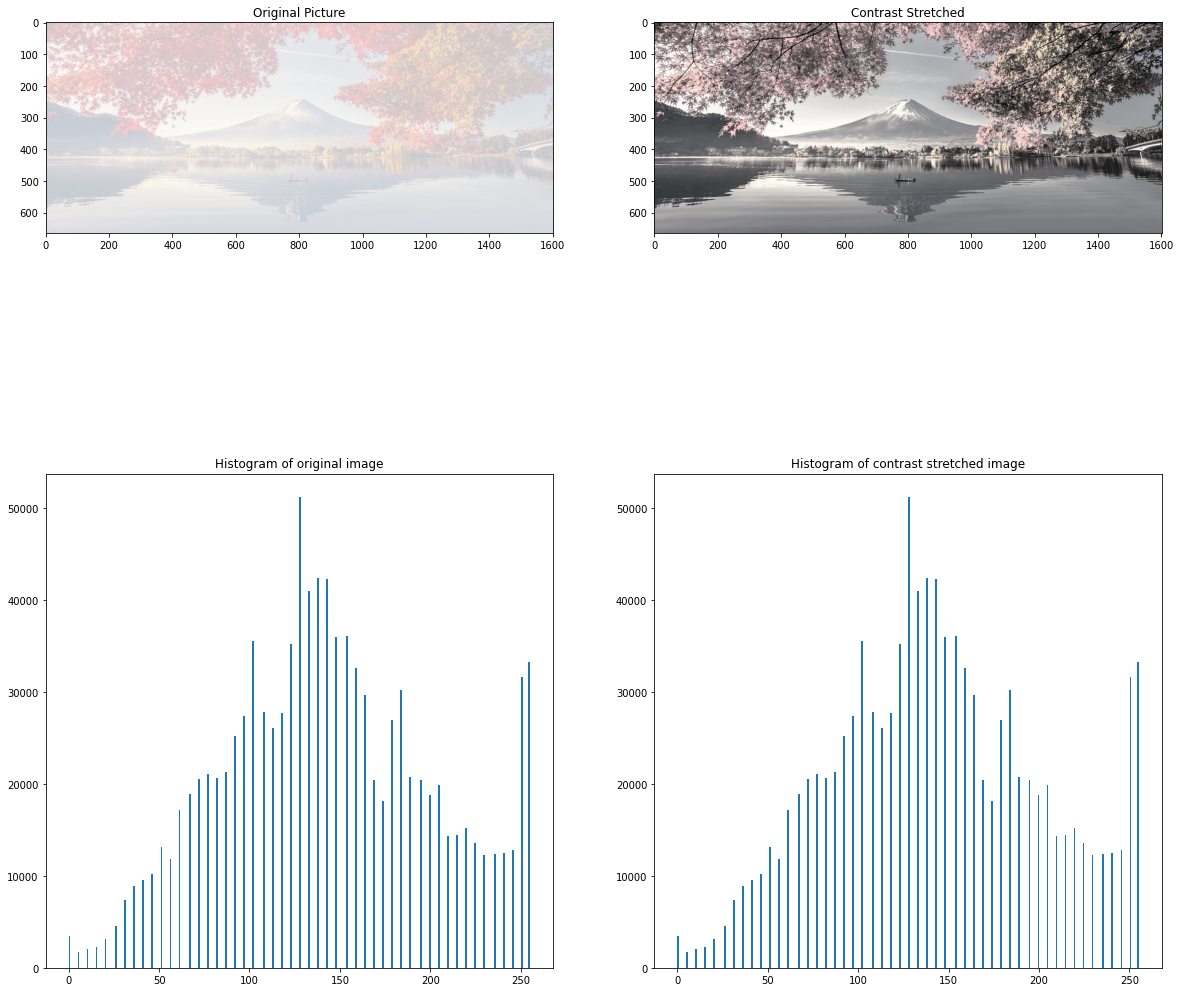

In [34]:
fig = plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.imshow(landscape)
plt.title('Original Picture')
plt.subplot(2,2,2)
plt.imshow(landscape_new)
plt.title('Contrast Stretched')
plt.subplot(2,2,3)
plt.hist(v.ravel(),256,[0,255])
plt.title('Histogram of original image')
plt.subplot(2,2,4)
plt.hist(v_new.ravel(),256,[0,255])
plt.title('Histogram of contrast stretched image')
plt.show()

## 3.3 Histogram Equalization

In [35]:
def histogramEqualization(img):
    out = np.copy(img)
    # getting histogram
    count = np.zeros(256)
    for i in out.flatten():   # flatten converts ndarrray to 1 d array
        count[i] += 1
    # cumsum
    for i in range(255):
        count[i + 1] += count[i]
    # normalization
    arr = (count - count.min()) * 255
    scale = count.max() - count.min()
    count = arr/scale
    count = count.astype('uint8')
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            out[row][col] = count[out[row][col]]
    return out

In [36]:
v_new2 = histogramEqualization(v)
landscape_hsv_new2 = landscape_hsv
landscape_hsv_new2[:,:,2] = v_new
landscape_new2 = cv2.cvtColor(landscape_hsv_new2,cv2.COLOR_HSV2RGB) 

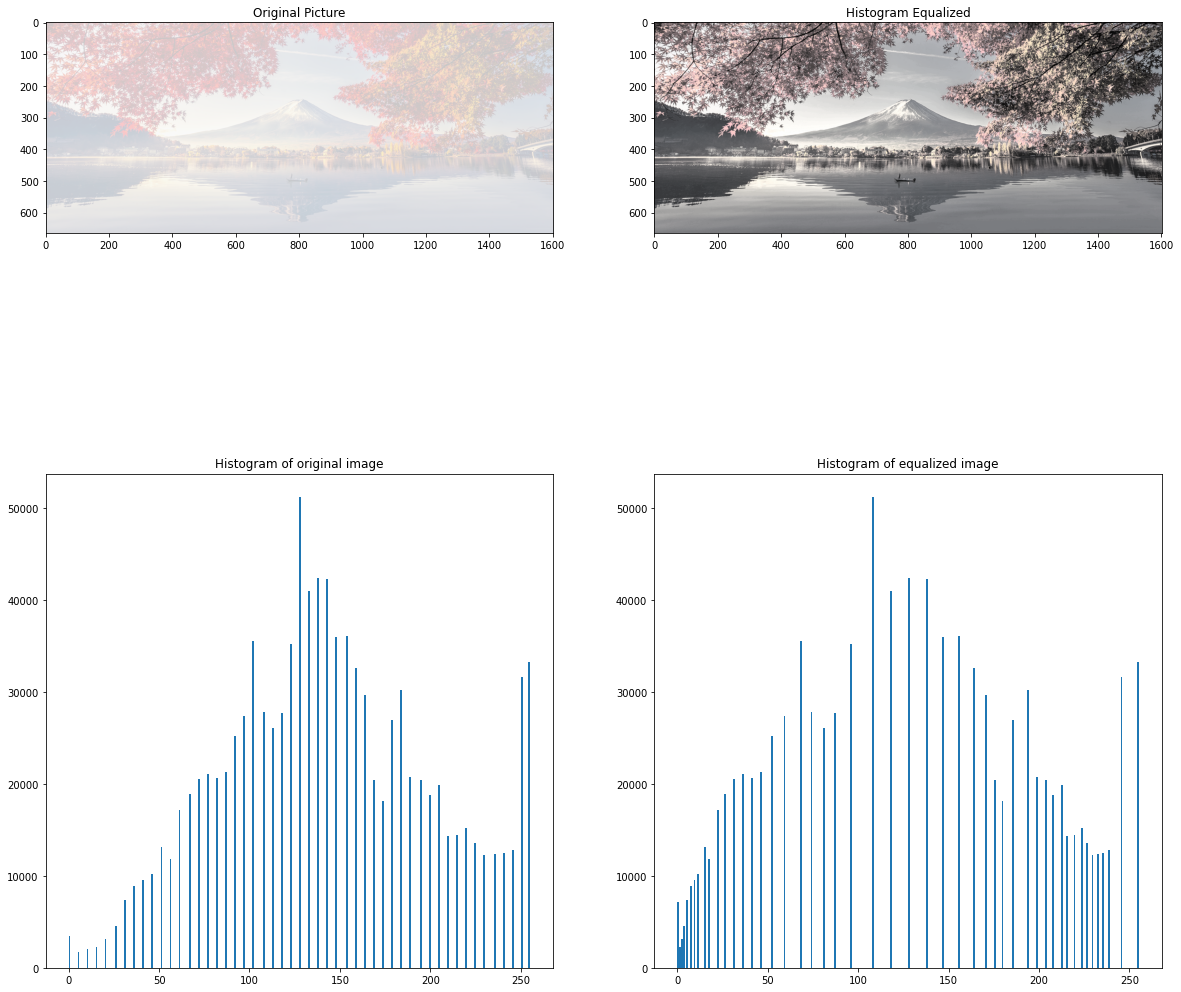

In [37]:
fig = plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.imshow(landscape)
plt.title('Original Picture')
plt.subplot(2,2,2)
plt.imshow(landscape_new2)
plt.title('Histogram Equalized')
plt.subplot(2,2,3)
plt.hist(v.ravel(),256,[0,255])
plt.title('Histogram of original image')
plt.subplot(2,2,4)
plt.hist(v_new2.ravel(),256,[0,255])
plt.title('Histogram of equalized image')
plt.show()

### 3.4.1 Vintage Effect

In [38]:
# loading images
babyyoda = cv2.imread(IMG_PATH+'babyyoda.jpeg')
babyyoda = cv2.cvtColor(babyyoda,cv2.COLOR_BGR2RGB)
# plt.imshow(babyyoda)

In [39]:
r = babyyoda[:,:,0]
g = babyyoda[:,:,1]
b = babyyoda[:,:,2]

In [40]:
r_new = np.rint(((r * .293) + (g *.769) + (b * .210))).astype(np.uint16)
g_new = np.rint(((r * .249) + (g *.686) + (b * .188))).astype(np.uint16)
b_new = np.rint(((r * .172) + (g *.534) + (b * .151))).astype(np.uint16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


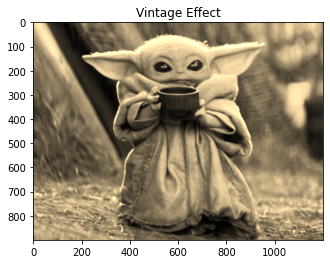

In [41]:
babyyoda_vintage = np.zeros(babyyoda.shape,dtype=int)
babyyoda_vintage[:,:,0] = r_new
babyyoda_vintage[:,:,1] = g_new
babyyoda_vintage[:,:,2] = b_new
plt.imshow(babyyoda_vintage)
plt.title("Vintage Effect")
plt.show()

### 3.4.2 Matrix Effect

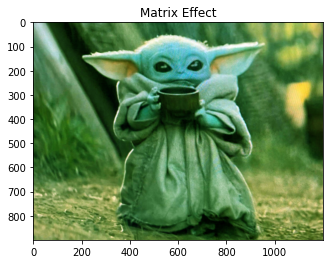

In [42]:
babyyoda_matrix = np.copy(babyyoda)/255
babyyoda_matrix[:,:,0] = babyyoda_matrix[:,:,0]**(3/2)
babyyoda_matrix[:,:,1] = babyyoda_matrix[:,:,1]**(4/5)
babyyoda_matrix[:,:,2] = babyyoda_matrix[:,:,2]**(3/2)
matrix = babyyoda_matrix*255
plt.imshow(babyyoda_matrix)
plt.title("Matrix Effect")
plt.show()

### 3.4.3 Vignetting Effect

In [43]:
def GaussianLPF(img,D0):
    row,col = img.shape
    filter = np.zeros(img.shape)
    D = np.zeros(img.shape)
    mid_row = img.shape[0]/2
    mid_col = img.shape[1]/2
    for u in range(row):
        for v in range(col):
            D[u][v] = np.sqrt((u-mid_row)**2 + (v-mid_col)**2)
            filter[u][v] = np.exp(-1*(D[u][v]**2)/(2*(D0**2)))
    return filter

In [44]:
texture = np.zeros([babyyoda.shape[0],babyyoda.shape[1]])
texture = GaussianLPF(texture,350)

In [45]:
# plt.imshow(texture,cmap="gray")
# plt.title("Vignette Texture")
# plt.show()

In [46]:
r_new = (r*texture).astype(np.uint64)
g_new = (g*texture).astype(np.uint64)
b_new = (b*texture).astype(np.uint64)

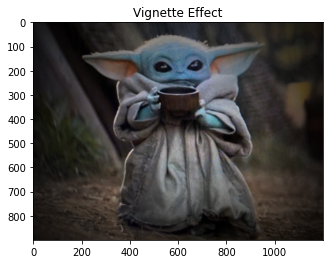

In [47]:
babyyoda_vignette = np.zeros(babyyoda.shape,dtype=int)
babyyoda_vignette[:,:,0] = r_new
babyyoda_vignette[:,:,1] = g_new
babyyoda_vignette[:,:,2] = b_new
plt.imshow(babyyoda_vignette)
plt.title("Vignette Effect")
plt.show()

### 3.4.4 Duo-Tone

In [48]:
def exp(index, exp):
    table = np.array([np.minimum((i**exp),255) for i in np.arange(0, 256)]).astype(np.uint8)
    index = cv2.LUT(index, table)
    return index
def duo_tone(img, channel):
    copy = np.copy(img)
    for i in range(3):
        if i == channel:
            copy[:, :, i] = exp((copy[:, :, i]),1.05)
        else:
            copy[:, :, i] = 0
    return copy

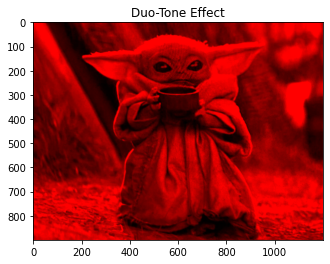

In [49]:

temp = babyyoda.copy()
babyyoda_duo = duo_tone(temp, 0)
plt.imshow(babyyoda_duo)
plt.title("Duo-Tone Effect")
plt.show()

## Final 3.4 Outputs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


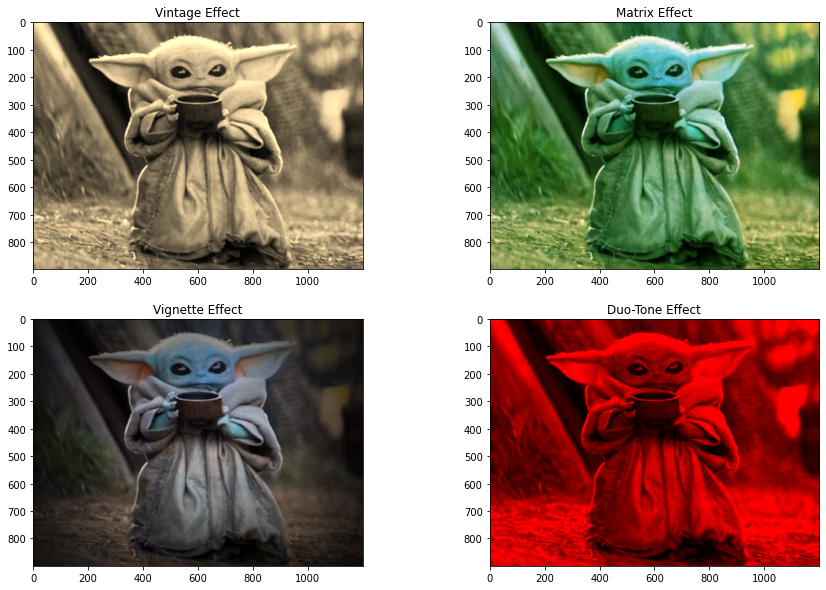

In [50]:
fig = plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
plt.imshow(babyyoda_vintage)
plt.title("Vintage Effect")
plt.subplot(2,2,2)
plt.imshow(babyyoda_matrix)
plt.title("Matrix Effect")
plt.subplot(2,2,3)
plt.imshow(babyyoda_vignette)
plt.title("Vignette Effect")
plt.subplot(2,2,4)
plt.imshow(babyyoda_duo)
plt.title("Duo-Tone Effect")
plt.show()

# Answer 4 - Realistic Systems

## 4.1 Image Rotation

In [51]:
def imrotate(img,theta,retainAllPixels):
    rad = math.radians(theta)
    if retainAllPixels == True:                                                                     # retain all pixels
        # print(img.shape)
        # calculating dims of new image
        h_new = round(abs(img.shape[0]*math.cos(rad)))+round(abs(img.shape[1]*math.sin(rad)))+1
        w_new = round(abs(img.shape[0]*math.sin(rad)))+round(abs(img.shape[1]*math.cos(rad)))+1
        out = np.zeros([h_new,w_new,img.shape[2]]).astype(np.uint64)
    else:                                                                                           # dont retain all pixels
        h_new = img.shape[0]
        w_new = img.shape[1]
        out = np.zeros([h_new,w_new,img.shape[2]]).astype(np.uint64)
    cen_h0 = round(((img.shape[0]+1)/2)-1)
    cen_w0 = round(((img.shape[1]+1)/2)-1)
    # print(cen_h0,cen_w0)
    cen_h1 = round(((out.shape[0]+1)/2)-1)
    cen_w1 = round(((out.shape[1]+1)/2)-1)
    # print(x0, y0)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x0=img.shape[1]-1-j-cen_w0                          # original img coords wrt original img centre
            y0=img.shape[0]-1-i-cen_h0                   

            x1=cen_w1 - round(x0*math.cos(rad)+y0*math.sin(rad))         # new coords after rotation. also wrt new img centre
            y1=cen_h1 - round(-x0*math.sin(rad)+y0*math.cos(rad))
          
            if x1 < w_new and y1 < h_new and x1>=0 and y1>=0:
                out[y1,x1] = img[i,j]
    return out.astype(np.uint64)

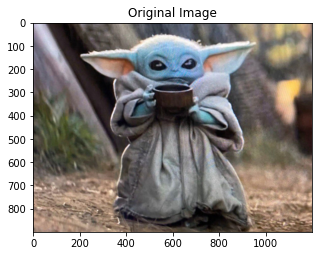

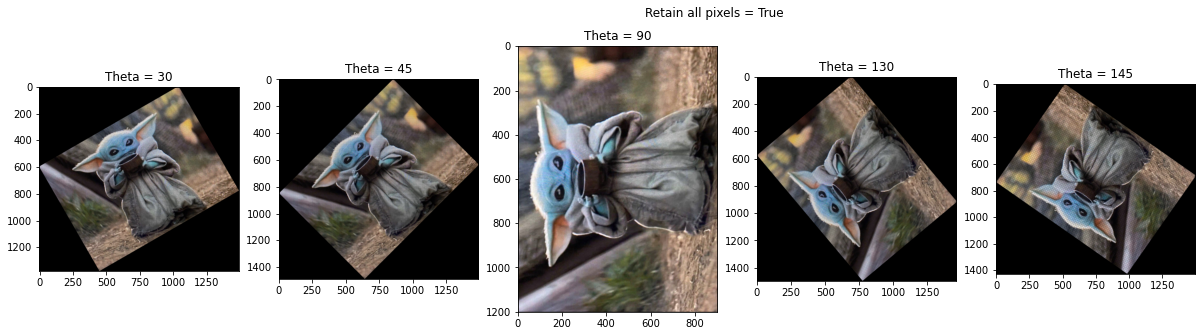

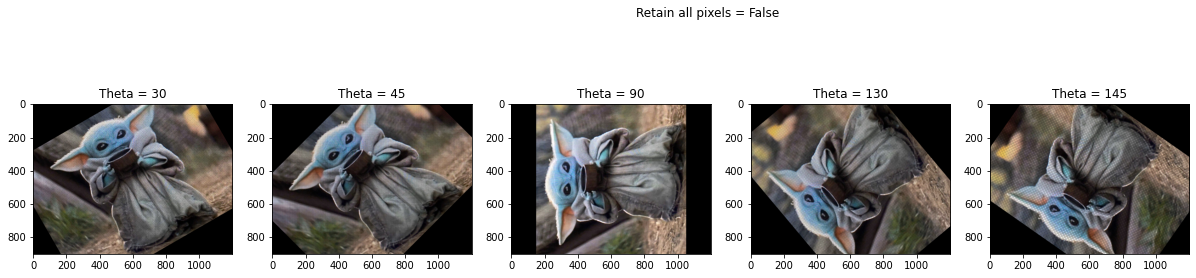

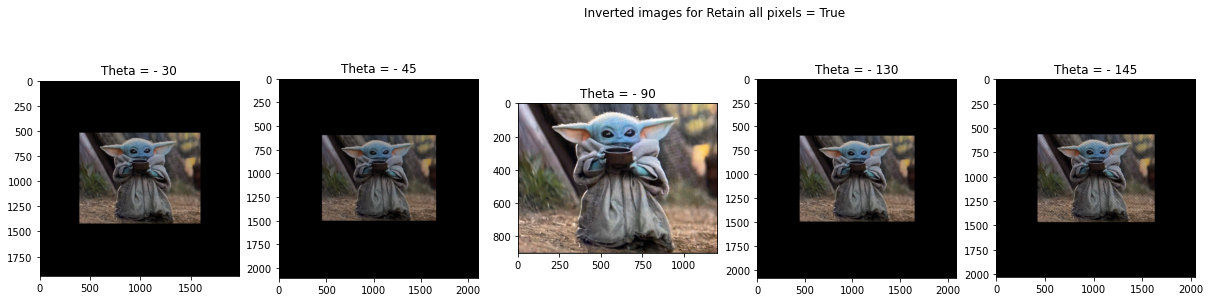

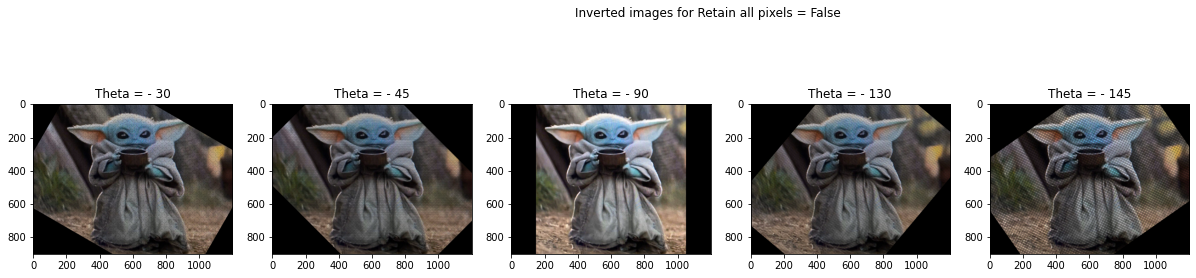

In [52]:
thetas = [30,45,90,130,145]
fig = plt.figure(figsize=[5,5])
plt.imshow(babyyoda)
plt.title("Original Image")
fig = plt.figure(figsize=[25,5])
plt.suptitle('Retain all pixels = True')
for i in range(len(thetas)):
    rotated_retained = imrotate(babyyoda,thetas[i],True)
    plt.subplot(1,6,i+1)
    plt.imshow(rotated_retained)
    plt.title("Theta = %i" %thetas[i])
fig = plt.figure(figsize=[25,5])
plt.suptitle('Retain all pixels = False')
for i in range(len(thetas)):
    rotated_notretained = imrotate(babyyoda,thetas[i],False)
    plt.subplot(1,6,i+1)
    plt.imshow(rotated_notretained)
    plt.title("Theta = %i" %thetas[i])
fig = plt.figure(figsize=[25,5])
plt.suptitle('Inverted images for Retain all pixels = True')
for i in range(len(thetas)):
    rotated_retained = imrotate(babyyoda,thetas[i],True)
    rotated_retained = imrotate(rotated_retained,-thetas[i],True)
    plt.subplot(1,6,i+1)
    plt.imshow(rotated_retained)
    plt.title("Theta = - %i" %thetas[i])
fig = plt.figure(figsize=[25,5])
plt.suptitle('Inverted images for Retain all pixels = False')
for i in range(len(thetas)):
    rotated_notretained = imrotate(babyyoda,thetas[i],False)
    rotated_notretained = imrotate(rotated_notretained,-thetas[i],False)
    plt.subplot(1,6,i+1)
    plt.imshow(rotated_notretained)
    plt.title("Theta = - %i" %thetas[i])

plt.show()

## 4.2 Hough Transform

### 4.2.1
Simple edge detection methods do not work to find anlge of rotation in images. We need hough transform to find the angle.

### 4.2.2

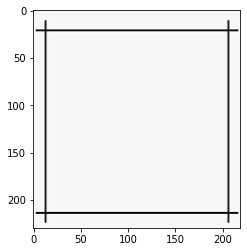

In [141]:
# loading images
square = cv2.imread(IMG_PATH+'square.png')
square = cv2.cvtColor(square,cv2.COLOR_BGR2GRAY)
plt.imshow(square,cmap="gray")

In [128]:
# Function that applies 'filter' on 'img'
def applyFilter(img, filter):
  # Padding image
  maxVal =np. max(filter.shape)
  img3 = np.zeros((img.shape[0] + 2 * maxVal, img.shape[1] + 2 * maxVal))
  img3[maxVal:img3.shape[0] - maxVal, maxVal:img3.shape[1] - maxVal] = img
  img3 = img3.astype('float')
  filter = filter.astype('float')
  img2 = img3.copy()
  # Convolution
  for r in range(filter.shape[0], img2.shape[0] - filter.shape[0] + 1):
    for c in range(filter.shape[1], img2.shape[1] - filter.shape[1] + 1):
      img2[r][c] = np.sum(img3[r - int(filter.shape[0] / 2):r - int(filter.shape[0] / 2) + filter.shape[0], c - int(filter.shape[1] / 2):c - int(filter.shape[1] / 2) + filter.shape[1]] * filter)
  # Remove padded region and return image
  return img2[maxVal:img2.shape[0] - maxVal, maxVal:img2.shape[1] - maxVal]

In [129]:
# Applying Sobel
imgx_Sobel = applyFilter(square, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
imgy_Sobel = applyFilter(square, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]))
sobel = np.rint(np.sqrt(imgx_Sobel ** 2 + imgy_Sobel ** 2))
sobel = np.where(sobel > 255, 255, sobel).astype('uint8')

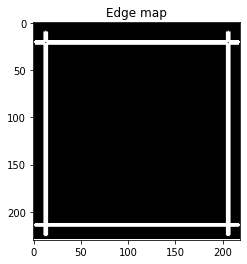

In [130]:
sobel = np.rint(sobel).astype(np.uint8)
sobel2 = np.rint(sobel/255).astype(np.uint8)    # Binarising image
# fig = plt.figure(figsize=[20,20])
plt.imshow(sobel2,cmap="gray")
plt.title("Edge map")
plt.show()

In [194]:
def HoughTransform(img):
    h,w = img.shape
    theta = np.arange(0,180,1)
    theta = np.radians(theta)
    len = theta.shape[0]
    diag_len = int(np.round(math.sqrt(h**2 + w**2)))
    rho = np.arange(-diag_len,diag_len,1)
    accumulator = np.zeros([len,2*diag_len])
    x_vals,y_vals = np.nonzero(img)
    len2 = x_vals.shape[0]

    for i in range(len2):
        x = x_vals[i]
        y = y_vals[i]

        for h in range(len):
            val = y*math.cos(math.radians(h)) + x*math.sin(math.radians(h))
            k = int(np.rint(val))
            # print(h,k)
            accumulator[h,k] += 1

    return accumulator,theta,rho

In [195]:
accumulator,thetas,rhos = HoughTransform(square)

Text(0.5, 1.0, 'Thresholded Accumulator Array')

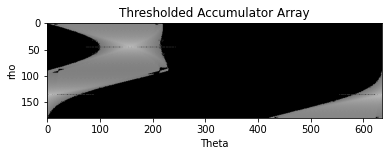

In [197]:
# plt.imshow(accumulator)
accumulator_thresh = np.copy(accumulator)
thresh = 200
accumulator_thresh[np.where(accumulator < thresh)] = 0
theta_vals,rho_vals = np.where(accumulator >= thresh)
plt.imshow(accumulator_thresh,cmap="gray")
plt.xlabel("Theta")
plt.ylabel("rho")
plt.title("Thresholded Accumulator Array")

### 4.2.3

In [59]:
# loading images
rotatedOMR1 = cv2.imread(IMG_PATH+'rotatedOMR1.png')
rotatedOMR1 = cv2.cvtColor(rotatedOMR1,cv2.COLOR_BGR2GRAY)
# plt.imshow(rotatedOMR1,cmap="gray")

In [60]:
# loading images
rotatedOMR2 = cv2.imread(IMG_PATH+'rotatedOMR2.png')
rotatedOMR2 = cv2.cvtColor(rotatedOMR2,cv2.COLOR_BGR2GRAY)
# plt.imshow(rotatedOMR2,cmap="gray")

In [61]:
# Applying Sobel
imgx_Sobel = applyFilter(rotatedOMR1, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
imgy_Sobel = applyFilter(rotatedOMR1, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]))
sobel = np.rint(np.sqrt(imgx_Sobel ** 2 + imgy_Sobel ** 2))
sobel = np.where(sobel > 255, 255, sobel).astype('uint8')

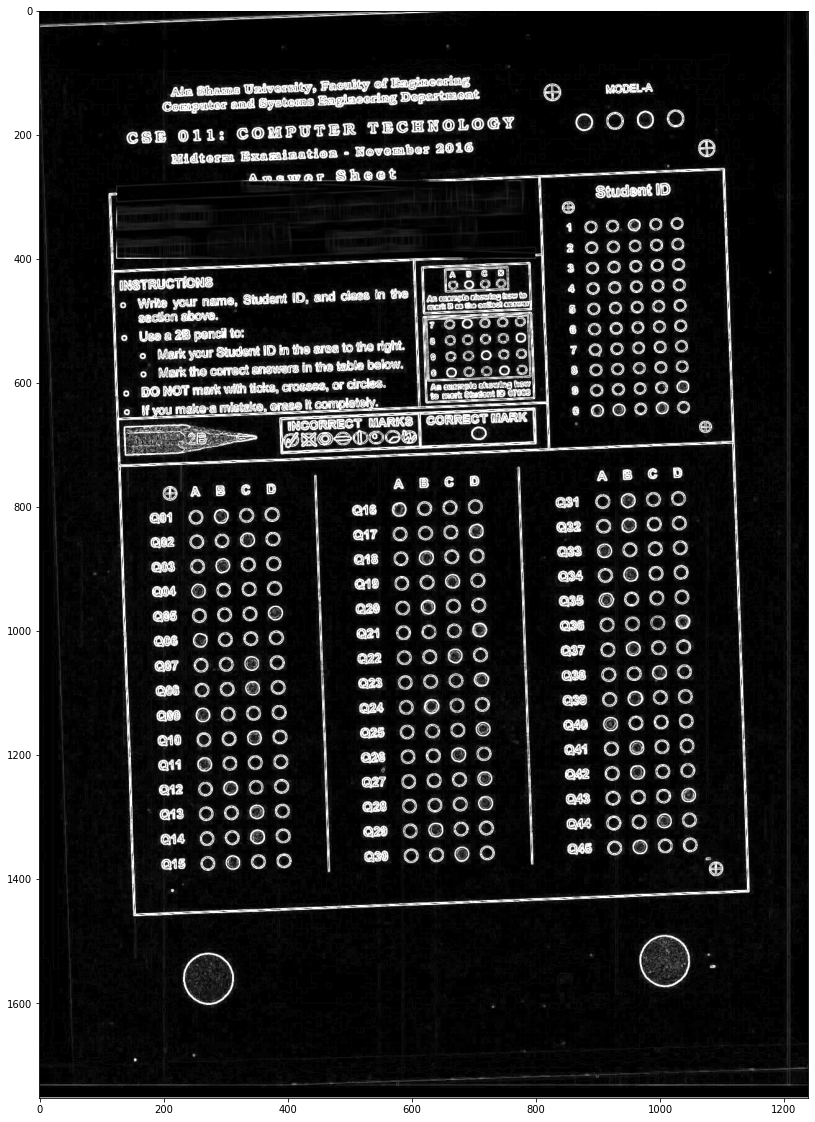

In [62]:
sobel2 = np.rint(sobel).astype(np.uint8)
fig = plt.figure(figsize=[20,20])
plt.imshow(sobel2,cmap="gray")

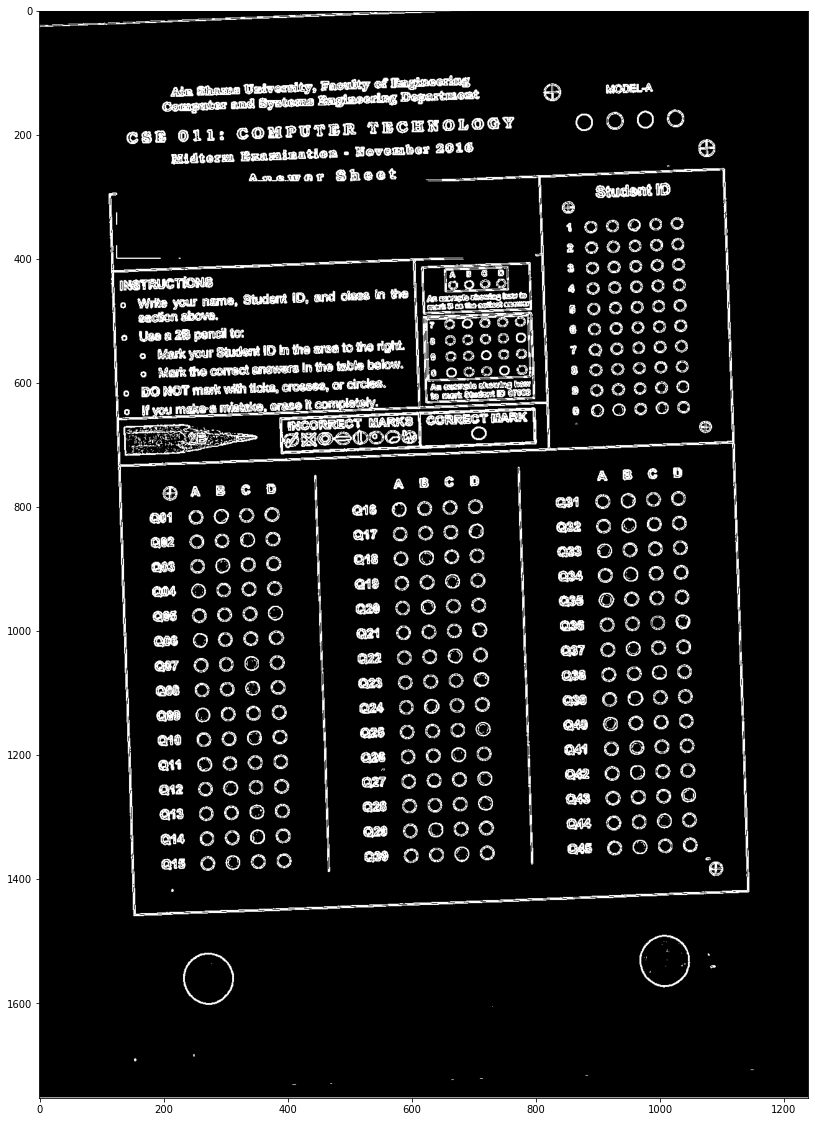

In [63]:
sobel2 = np.rint(sobel/255).astype(np.uint8)
fig = plt.figure(figsize=[20,20])
plt.imshow(sobel2,cmap="gray")

# Answer 5 - More Morphology

## 5.1
### 5.1.1 Objects having one or more holes

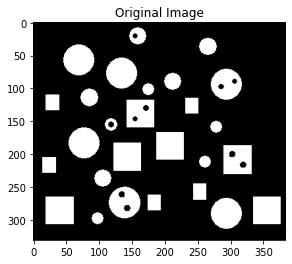

In [64]:
# loading images
shapes = cv2.imread(IMG_PATH+'shapes.png')
shapes = cv2.cvtColor(shapes,cv2.COLOR_BGR2GRAY)
shapes[shapes > 0] = 1                            # Thresholding
plt.imshow(shapes,cmap="gray")
plt.title("Original Image")
plt.show()

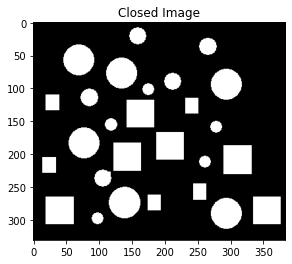

In [65]:
# Applying Closing

# fig = plt.figure(figsize=[20,20])
dilated = dilate(shapes,np.ones((7,9)))
# plt.imshow(a,cmap="gray")
closed = erode(dilated,np.ones((7,9)))
plt.imshow(closed,cmap="gray")
plt.title("Closed Image")
plt.show()

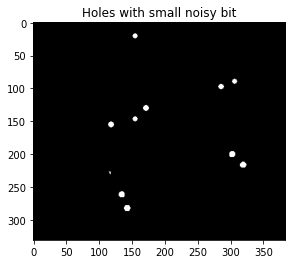

In [66]:
holes = closed - shapes
plt.imshow(holes,cmap="gray")
plt.title("Holes with small noisy bit")
plt.show()

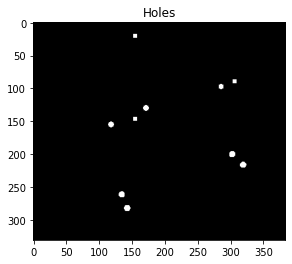

In [67]:
# Applying Opening to remove the noise part

# fig = plt.figure(figsize=[20,20])
dilated = erode(holes,np.ones((3,3)))
# plt.imshow(a,cmap="gray")
holes = dilate(dilated,np.ones((3,3)))
plt.imshow(holes,cmap="gray")
plt.title("Holes")
plt.show()

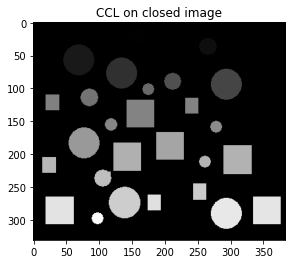

In [68]:
connected = connectedComponentLabelling(closed)
# fig = plt.figure(figsize=[20,20])
plt.imshow(connected,cmap="gray")
plt.title("CCL on closed image")
plt.show()
labels = np.unique(connected)
# print(labels)                # => 52 different labels
labels = labels.tolist()

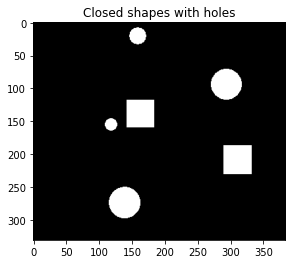

In [69]:
# To get only shapes with holes, take product of "holes" and "connected"
# Only elements with holes will have nonzero labels 
temp = connected*holes
# plt.imshow(temp,cmap="gray")
labels_new = np.unique(temp)
labels_new = labels_new.tolist()
# print(labels_new)

# Get list of labels to turn zero
for i in labels[:]:
    if i in labels_new:
        labels.remove(i)
# print(labels)

for i in range(len(labels)):
    connected[connected == labels[i]] = 0           # change labels of all non hole shapes to zero
connected[connected > 0] = 1                        # change labels of remaining shapes to 1
plt.imshow(connected,cmap="gray")
plt.title("Closed shapes with holes")
plt.show()

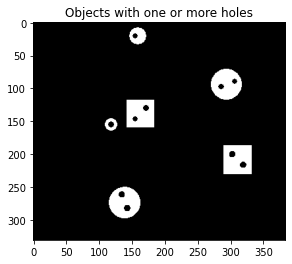

In [70]:
shapeswithholes = connected*shapes                      # taking product with original image so that holes reappear
plt.imshow(shapeswithholes,cmap="gray")
plt.title("Objects with one or more holes")
plt.show()

Number of objects with one or more holes = 6

### 5.1.2 Circular objects

### Method tried -> Hit or Miss transform to top left identify corners of image and then get the rectangular shapes which have to be removed

In [71]:
def corner_find(img, kernel):
    out = np.zeros(img.shape)
    h,w = img.shape
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            temp = img[i - 1: i + 2, j - 1: j + 2]
            flag = 0
            for x in range(temp.shape[0]):
                for y in range(temp.shape[1]):
                    if temp[x][y] != kernel[x][y]:
                        flag = 1                         # ignore the case if flag  1
            if flag == 0:
                out[i + 1, j + 1] = 1
            else:
                out[i + 1, j + 1] = 0
    print(temp.shape)
    return out

(3, 3)
11.0


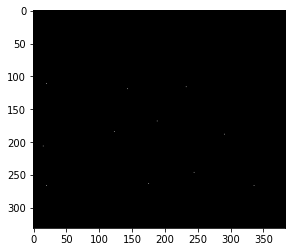

In [72]:
kern = np.array([[0, 0, 0],[0, 1, 1],[0, 1, 1]])
corners = corner_find(shapes, kern)
plt.imshow(corners,cmap="gray")
print(np.sum(corners))          # We can see from the sum that 11 corners are detected

In [73]:
temp = corners*shapes
print(np.sum(temp))     # 11 non non rounded objects will be located

11.0


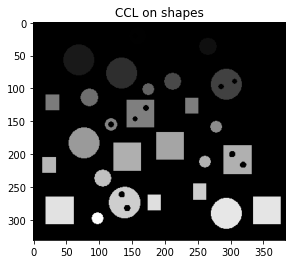

In [74]:
connected3 = connectedComponentLabelling(shapes)
plt.imshow(connected3,cmap="gray")
plt.title("CCL on shapes")
plt.show()

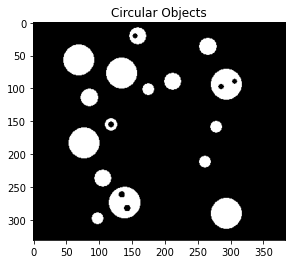

In [75]:
CCL_temp = np.copy(connected3)
labels = np.unique(CCL_temp)      # gives us labels of all objects
# print(labels)                
labels = labels.tolist()

# To get only rectangular objects, take product of "corners" and "CCL_temp"
# Only rectangular elements with corners will have labels changed to zero 
temp = CCL_temp*corners
# plt.imshow(temp,cmap="gray")
labels_new = np.unique(temp)
labels_new = labels_new.tolist()
# print(labels_new)

for i in range(len(labels_new)):
    CCL_temp[CCL_temp == labels_new[i]] = 0           # change labels of all non hole shapes to zero
CCL_temp[CCL_temp > 0] = 1                        # change labels of remaining shapes to 1
plt.imshow(CCL_temp,cmap="gray")
plt.title("Circular Objects")
plt.show()

### 5.1.3 Rectangular objects not containing any holes

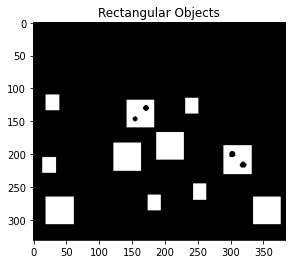

In [76]:
CCL2_temp = np.copy(connected3)
labels = np.unique(CCL2_temp)      # gives us labels of all objects
# print(labels)                
labels = labels.tolist()

# To get only rectangular objects, take product of "corners" and "CCL2_temp"
# Only rectangular elements with corners will have labels, rest will be changed to zero 
temp = CCL2_temp*corners
# plt.imshow(temp,cmap="gray")
labels_new = np.unique(temp)
labels_new = labels_new.tolist()
# print(labels_new)

# Get list of labels to turn zero
for i in labels[:]:
    if i in labels_new:
        labels.remove(i)
# print(labels)

for i in range(len(labels)):
    CCL2_temp[CCL2_temp == labels[i]] = 0           # change labels of all non hole shapes to zero
CCL2_temp[CCL2_temp > 0] = 1                        # change labels of remaining shapes to 1
plt.imshow(CCL2_temp,cmap="gray")
plt.title("Rectangular Objects")
plt.show()

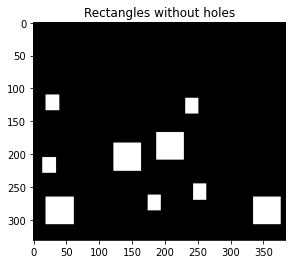

In [77]:
rectangleswithholes = CCL2_temp*shapeswithholes
rectangleswithoutholes = CCL2_temp - rectangleswithholes
plt.imshow(rectangleswithoutholes,cmap="gray")
plt.title("Rectangles without holes")
plt.show()

### 5.1.4 Circular objects with one or more holes

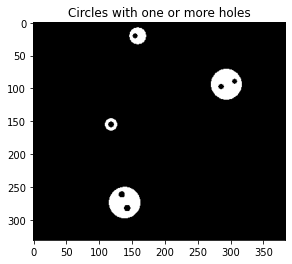

In [78]:
circleswithholes = CCL_temp*shapeswithholes
plt.imshow(circleswithholes,cmap="gray")
plt.title("Circles with one or more holes")
plt.show()

## Final Outputs:

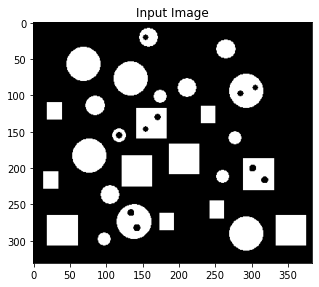

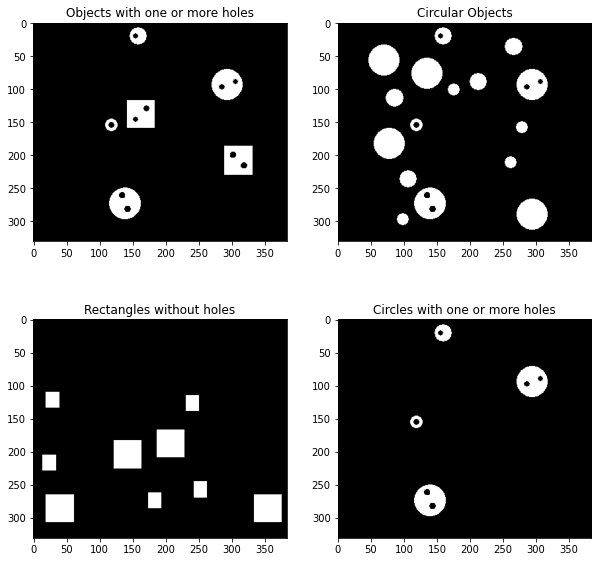

In [79]:
fig = plt.figure(figsize=[5,5])
plt.imshow(shapes,cmap="gray")
plt.title("Input Image")
plt.show()
fig = plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(shapeswithholes,cmap="gray")
plt.title("Objects with one or more holes")
plt.subplot(2,2,2)
plt.imshow(CCL_temp,cmap="gray")
plt.title("Circular Objects")
plt.subplot(2,2,3)
plt.imshow(rectangleswithoutholes,cmap="gray")
plt.title("Rectangles without holes")
plt.subplot(2,2,4)
plt.imshow(circleswithholes,cmap="gray")
plt.title("Circles with one or more holes")
plt.show()

## 5.2
### 5.2.1 Non overlapping circles

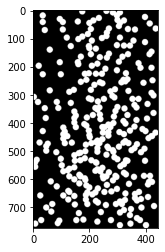

In [80]:
# loading images
circles = cv2.imread(IMG_PATH+'circles.jpg')
circles = cv2.cvtColor(circles,cv2.COLOR_BGR2GRAY)
circles[circles > 127] = 255                          # Thresholding
circles[circles <= 127] = 0
circles = circles/255                                 # Binarizing
plt.imshow(circles,cmap="gray")

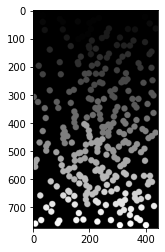

In [81]:
circle_CCL = connectedComponentLabelling(circles)
plt.imshow(circle_CCL,cmap="gray")

In [82]:
labels = np.unique(circle_CCL)      # gives us labels of all objects
print((len(labels)))                
labels = labels.tolist()
labels_copy = labels.copy()

134


From observation, size of 1 circle = 420,so if we check counts of each label, we can identify the overlapping ones as they will have more area

In [83]:
for i in range(len(labels)):
    temp = labels[i]
    # print(len(labels))
    if np.count_nonzero(circle_CCL == temp) <= 420:
        # print(temp)
        labels_copy.remove(temp)                        # removing labels which have less area than 420. i.e. non overlapping
# print(labels_copy)

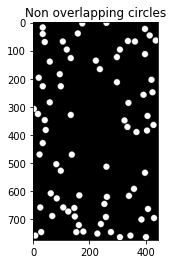

In [84]:
circle_nonoverlapping = np.copy(circle_CCL)
for i in range(len(labels_copy)):
    circle_nonoverlapping[circle_nonoverlapping == labels_copy[i]] = 0           # change labels of all overlapping circles to zero
circle_nonoverlapping[circle_nonoverlapping > 0] = 1                             # changing remaining labels to one
plt.imshow(circle_nonoverlapping,cmap="gray")
plt.title("Non overlapping circles")
plt.show()

### 5.2.2 Boundary touching circles

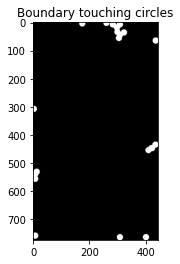

In [85]:
circle_boundary_touching = np.copy(circle_CCL)
labels_copy = labels.copy()
# print(len(labels_copy))

# get a list of non boundary touching circles
i = 0
for j in range(circle_boundary_touching.shape[1]):
    if circle_boundary_touching[i,j] in labels_copy:
        labels_copy.remove(circle_boundary_touching[i,j])
i = circle_boundary_touching.shape[0]-1
for j in range(circle_boundary_touching.shape[1]):
    if circle_boundary_touching[i,j] in labels_copy:
        labels_copy.remove(circle_boundary_touching[i,j])
j = 0
for i in range(circle_boundary_touching.shape[0]):
    if circle_boundary_touching[i,j] in labels_copy:
        labels_copy.remove(circle_boundary_touching[i,j])
j = circle_boundary_touching.shape[1]-1
for i in range(circle_boundary_touching.shape[0]):
    if circle_boundary_touching[i,j] in labels_copy:
        labels_copy.remove(circle_boundary_touching[i,j])
# print(len(labels_copy))

for i in range(len(labels_copy)):
    circle_boundary_touching[circle_boundary_touching == labels_copy[i]] = 0           # change labels of all non boundary touching circles to zero
circle_boundary_touching[circle_boundary_touching > 0] = 1                             # changing remaining labels to one

plt.imshow(circle_boundary_touching,cmap="gray")
plt.title("Boundary touching circles")
plt.show()

### 5.2.3 Only overlapping circles

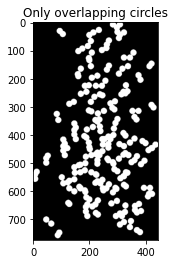

In [86]:
circles_overlapping = circles - circle_nonoverlapping
plt.imshow(circles_overlapping,cmap="gray")
plt.title("Only overlapping circles")
plt.show()

## Final outputs

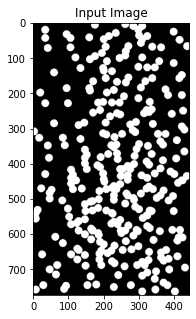

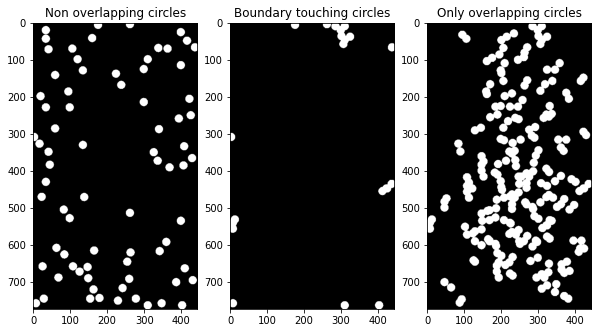

In [87]:
fig = plt.figure(figsize=[5,5])
plt.imshow(circles,cmap="gray")
plt.title("Input Image")
plt.show()
fig = plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
plt.imshow(circle_nonoverlapping,cmap="gray")
plt.title("Non overlapping circles")
plt.subplot(1,3,2)
plt.imshow(circle_boundary_touching,cmap="gray")
plt.title("Boundary touching circles")
plt.subplot(1,3,3)
plt.imshow(circles_overlapping,cmap="gray")
plt.title("Only overlapping circles")
plt.show()